![Astrofisica Computacional](../logo.PNG)

---
## 01. Error Analysis


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract


This notebook presents some fundamental concepts of error analysis and stability.

---

Various sources of error appear in numerical calculations. Some of them are:

**Experimental uncertainty** : The experimental data is limited by the precision of the measuring devices. Therefore it is usual to represent the experimental quantities with the format $x \pm \Delta x$ where $\Delta x$ corresponds to the uncertainty in the measurements.\
When experimental quantities or data are used in numerical algorithms, uncertainties can lead to large final errors.

**Rounding Errors (Floating Point Numbers)** : The computational representation of a number is always limited by the memory allocated to its representation. Therefore, a rounding error is inherent in any quantity stored in a computer and this fact can lead to an accumulation that eventually leads to a large error if not controlled by the algorithm.

**Truncation Errors** : When a function is represented in the computer, such as a square root, an exponential, a logarithm, etc., using series expansions, the truncation of the series or the iterations of the algorithm induce a error that can accumulate at each step.

Below we will illustrate the existence of these sources of error with some specific examples.

---
### Rounding Errors (Floating Point Numbers)

First, we will define a floating point number,

In [1]:
x = 3.1416
x

3.1416

If this number is shown on the screen, with a precision of 20 decimal places, an error induced by the representation made by the computer can be observed. This error is inherent in the finite number of bits used to store the floating point number.

In [4]:
using Printf

@printf "%.20f" x

3.14159999999999994813

Thus, adding a small number to $x$ results in something unexpected:

In [5]:
y = x + 0.0000000000000001
@printf "%.20f" y

3.14159999999999994813

#### Machine Epsilon

The quantity called **machine epsilon** corresponds to the minimum value $\epsilon$ for which the machine assumes that $1. + \epsilon= 1$. Mathematically we define it by saying that

$\epsilon = \min \left[ \delta >0 |: 1 +\delta >1 \right] $

This quantity defines the precision of the machine to represent floating point numbers and to perform calculations with them.

In [6]:
epsilon = 1.

while 1. + epsilon != 1.
    epsilon = epsilon/2.
end

epsilon

1.1102230246251565e-16

---
Consider the floating point number $y = \cos \frac{\pi}{2}$. This number is expected to equal zero. However, a simple calculation gives us a floating-point number representation of zero:

In [7]:
pi

π = 3.1415926535897...

In [8]:
y = cos(pi/2.) 
y

6.123233995736766e-17

Another example of the round-off error appears when we take the square root of the number 3,

In [9]:
z = sqrt(3)
z

1.7320508075688772

Note that, due to rounding error, $\sqrt{3} \cdot \sqrt{3} \neq 3$

In [10]:
z*z

2.9999999999999996

---
### Absolute and Relative Errors

Next we will define **absolute** and **relative** errors. Denoting the *true* value of a quantity by $X$ and its *approximate* value by $x$, we have

$\epsilon_a = \left| X - x \right|$ : absolute error


$\epsilon_r = \left| \frac{X - x}{X} \right|$ : relative error

In [11]:
X = pi
x = 3.1416

abs_error = abs(X - x) 
abs_error

7.346410206832132e-6

In [12]:
rel_error = abs((X - x)/X)
rel_error

2.3384349967961744e-6

---
### Truncation Error

Consider the function $\sin x$ in its approximate form

$\sin x = \sum_{n=1}^\infty (-1)^{n-1} \frac{x^{2n-1}}{(2n-1)!}$

The approximation to order 7 (i.e. neglecting orders 7 and higher) will be

$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120}$.

This approximation of the function $\sin x$ induces a **truncation error** that can be estimated by the following function

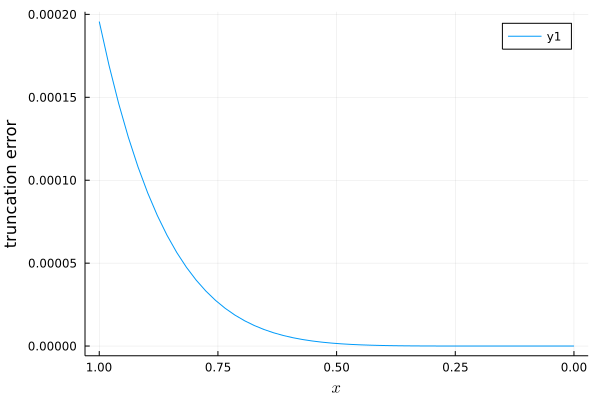

In [23]:
using Plots
using LaTeXStrings

function truncation_error(x)
    """
    ------------------------------------------
    Returns the truncarion error obtained when
    comparing the 7th order accurate 
    approximation of the sin x function and 
    the numpy.sin() function 
    ------------------------------------------
    Arguments:
    x : point at which the truncation error is
    calculated
    ------------------------------------------
    """
    mysin = x - x^3/6 + x^5/120
    return abs(sin(x) - mysin)
end

x = LinRange(0, 1, 50)

plot(x, truncation_error.(x), xlabel=L"x", ylabel="truncation error", xflip=true)

#### Estimating the precision of a truncated series

To estimate the order of precision of a truncated approximation of a function, we will take a number in the range $0<x<1$ and compute the truncation error. Then the chosen number will be halved and the truncation error will be calculated again. The ratio between the two errors obtained results in a factor of the form $2^n$, where $n$ is the order of precision of the approximation.

In [41]:
# Randomly choosing the number in the range 0<x<1
x = rand()  

# Calculate the truncation errors and their ratio
te_x = truncation_error(x)
te_x2 = truncation_error(x/2)
ratio = te_x/te_x2 

# Results
@printf "For x = %.3f the truncation error is: %.3e \n" x te_x
@printf "For x = %.3f the truncation error is: %.3e \n" x/2 te_x2
@printf "The reason of these values is %.3f \n" ratio
@printf "which is approximately 2^%.1f \n" log2(ratio)


For x = 0.191 the truncation error is: 1.828e-09 
For x = 0.095 the truncation error is: 1.428e-11 
The reason of these values is 127.952 
which is approximately 2^7.0 


---
### Stability of an Algorithm

An algorithm, equation or problem is called **unstable** or **ill-conditioned** if small changes in the input data produce large changes in the output data.

To illustrate a stable algorithm, consider the recurrence relation

$x_0 = 1$\
$x_1 = \frac{1}{3}$\
$x_{n+1} = \frac{13}{3}x_n - \frac{4}{3} x_{n-1} $

which is equivalent to

$x_n = \left( \frac{1}{3} \right)^n$.

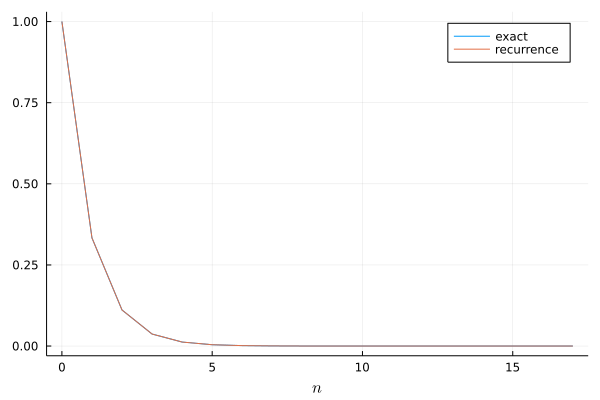

In [66]:
n = 18
X = zeros(n)
x = zeros(n)

X[1] = 1
X[2] = 1/3

x[1] = 1
x[2] = 1/3

for i in 3:n 
    X[i] = 13*X[i-1]/3 - 4*X[i-2]/3
    x[i] = (1/3)^(i-1)
end

abs_error = abs.(X - x)
rel_error = abs.((X - x)./X)

plot(0:n-1, X, label="exact")
plot!(0:n-1, x, xlabel=L"n", label="recurrence")


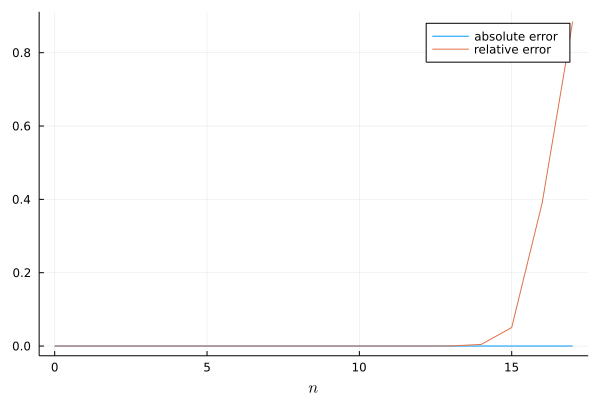

In [64]:
plot(0:n-1, abs_error, label="absolute error", xlabel=L"n")
plot!(0:n-1, rel_error, label="relative error")

Until the step $n=15$ in the recurrence relation, the absolute error is practically zero, while the relative error grows to only $0.05 = 5\%$. This shows that the algorithm is **stable**.

---
On the other hand, the recurrence relation

$x_0 = 1$\
$x_1 = 4$\
$x_{n+1} = \frac{13}{3}x_n - \frac{4}{3} x_{n-1} $

compared to

$x_n = 4^n$,

shows a completely different behavior,

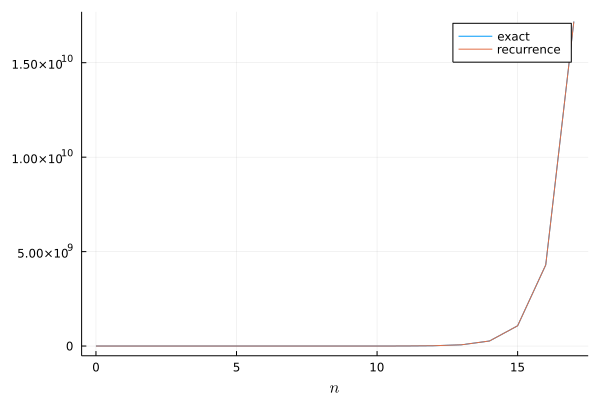

In [69]:
n = 18
X = zeros(n)
x = zeros(n)

X[1] = 1
X[2] = 4

x[1] = 1
x[2] = 4

for i in 3:n
    X[i] = 13*X[i-1]/3 - 4*X[i-2]/3
    x[i] = (4)^(i-1)
end

abs_error = abs.(X - x)
rel_error = abs.((X - x)./X)

plot(0:n-1, X, label="exact")
plot!(0:n-1, x, xlabel=L"n", label="recurrence")


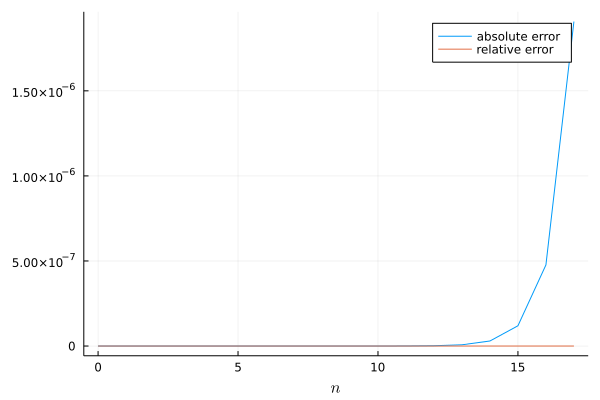

In [70]:
plot(0:n-1, abs_error, label="absolute error", xlabel=L"n")
plot!(0:n-1, rel_error, label="relative error")

Note that, approximately up to step $n=20$, the relative error is very small but the absolute error grows rapidly. The algorithm is said to be **unstable**.